# DATA COLLECTION

## Import Data and Required Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [2]:
df = pd.read_csv('data/train.csv')

### Show Top 5 records

In [3]:
df.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP


#### Shape of the datset

In [4]:
df.shape

(750000, 10)

## Dataset Information

- Temparature – Temperature value of the environment (int)

- Humidity – Humidity percentage in the environment (int)

- Moisture – Soil moisture level(int)

- Soil Type – Type of soil (e.g., Clayey, Sandy, Red, etc.)

- Crop Type – Type of crop grown (e.g., Sugarcane, Millets, Barley, Paddy, etc.)

- Nitrogen – Nitrogen content in soil (int)

- Potassium – Potassium content in soil (int)

- Phosphorous – Phosphorus content in soil (int)

- Fertilizer Name – Fertilizer recommendation label (e.g., 28-28, 17-17-17, 10-26-26, DAP, etc.)

### Check for missing values

In [5]:
df.isna().sum()

id                 0
Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

- There are no missing values in the dataset

### Check for duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

- There are no duplicates in the dataset

### Check Data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               750000 non-null  int64 
 1   Temparature      750000 non-null  int64 
 2   Humidity         750000 non-null  int64 
 3   Moisture         750000 non-null  int64 
 4   Soil Type        750000 non-null  object
 5   Crop Type        750000 non-null  object
 6   Nitrogen         750000 non-null  int64 
 7   Potassium        750000 non-null  int64 
 8   Phosphorous      750000 non-null  int64 
 9   Fertilizer Name  750000 non-null  object
dtypes: int64(7), object(3)
memory usage: 57.2+ MB


### Checking the number of unique values of each column

In [8]:
df.nunique()

id                 750000
Temparature            14
Humidity               23
Moisture               41
Soil Type               5
Crop Type              11
Nitrogen               39
Potassium              20
Phosphorous            43
Fertilizer Name         7
dtype: int64

### Checking statistics of dataset

In [9]:
df.describe()

,id,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,31.503565,61.038912,45.184147,23.093808,9.478296,21.073227
std,216506.495284,4.025574,6.647695,11.794594,11.216125,5.765622,12.346831
min,0.000000,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,187499.750000,28.000000,55.000000,35.000000,13.000000,4.000000,10.000000
50%,374999.500000,32.000000,61.000000,45.000000,23.000000,9.000000,21.000000
75%,562499.250000,35.000000,67.000000,55.000000,33.000000,14.000000,32.000000
max,749999.000000,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


Insights from Numerical Data

- Temperature ranges from 25°C to 38°C, with an average of 31.5°C. The data is fairly concentrated (std ≈ 4.0), meaning most values stay close to the mean.

- Humidity values lie between 50% and 72%, with a mean of 61%. The distribution is relatively tight (std ≈ 6.6), suggesting limited variation in humidity levels.

- Moisture spans 25% to 65%, averaging 45%. Standard deviation (~11.8) indicates a wider spread compared to temperature and humidity, so soil moisture varies more significantly across samples.

- Nitrogen content ranges from 4 to 42 units, with an average of 23 units. The std (~11.2) shows notable variation, meaning different soils/crops require quite different nitrogen levels.

- Potassium has the lowest average (9.5 units) among nutrients, ranging from 0 to 19 units. Its std (~5.8) suggests moderate variation. Interestingly, some samples recorded 0 potassium, which might represent deficient soils.

- Phosphorous ranges from 0 to 42 units, with an average of 21 units. The variation is the highest among nutrients (std ≈ 12.3), highlighting strong differences in soil phosphorus content.

### Exploring the data

In [10]:
df.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP


In [14]:
print("Categories in 'Soil Type' variable:     ", end = "")
print(df['Soil Type'].unique())

print("Categories in 'Crop Type' variable:     ", end = "")
print(df['Crop Type'].unique())

print("Categories in 'Fertilizer Name:       ", end = "")
print(df['Fertilizer Name'].unique())

Categories in 'Soil Type' variable:     ['Clayey' 'Sandy' 'Red' 'Loamy' 'Black']
Categories in 'Crop Type' variable:     ['Sugarcane' 'Millets' 'Barley' 'Paddy' 'Pulses' 'Tobacco' 'Ground Nuts'
 'Maize' 'Cotton' 'Wheat' 'Oil seeds']
Categories in 'Fertilizer Name:       ['28-28' '17-17-17' '10-26-26' 'DAP' '20-20' '14-35-14' 'Urea']


In [18]:
#Define numerical and Categorical Values
numeric_features = [feature for feature in  df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

#Print columns
print(f'The Data has {len(numeric_features)} Numerical Features : {numeric_features}')
print(f'The Data has {len(categorical_features)} Categorical Features : {categorical_features}')

The Data has 7 Numerical Features : ['id', 'Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']
The Data has 3 Categorical Features : ['Soil Type', 'Crop Type', 'Fertilizer Name']


## Exploring the data (Visualization)

### Correlation Heat Map

<Figure size 800x600 with 0 Axes>

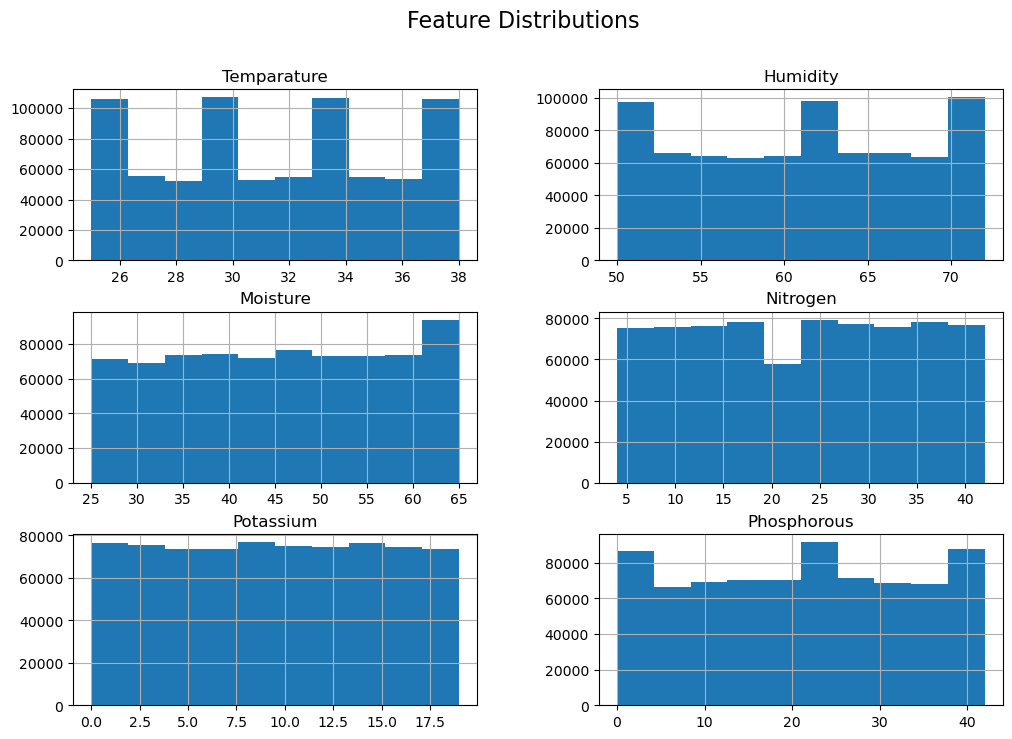

In [26]:
# 2. Distribution of numerical features
df[["Temparature", "Humidity", "Moisture", "Nitrogen", "Potassium", "Phosphorous"]].hist(figsize=(12,8), bins=10)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


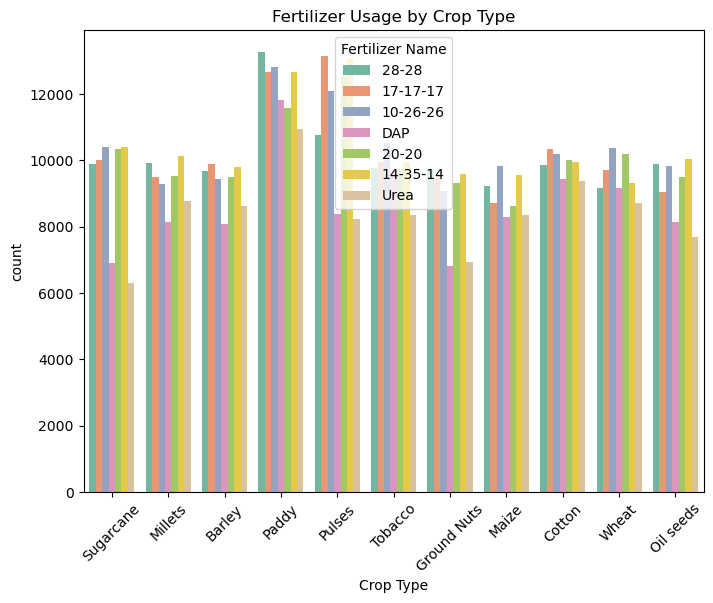

In [27]:
# 3. Crop Type vs Fertilizer Usage
plt.figure(figsize=(8,6))
sns.countplot(x="Crop Type", hue="Fertilizer Name", data=df, palette="Set2")
plt.title("Fertilizer Usage by Crop Type")
plt.xticks(rotation=45)
plt.show()

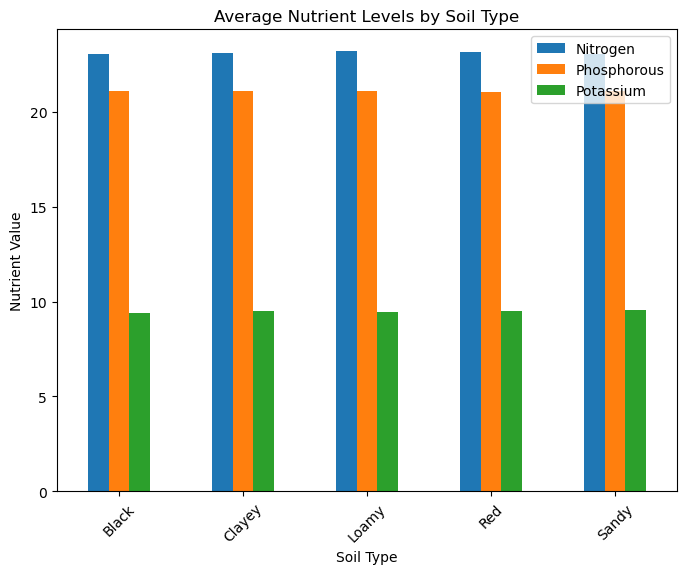

In [28]:
# 4. Soil Type vs Average Nitrogen, Phosphorous, Potassium
avg_nutrients = df.groupby("Soil Type")[["Nitrogen", "Phosphorous", "Potassium"]].mean().reset_index()
avg_nutrients.plot(x="Soil Type", kind="bar", figsize=(8,6))
plt.title("Average Nutrient Levels by Soil Type")
plt.ylabel("Nutrient Value")
plt.xticks(rotation=45)
plt.show()


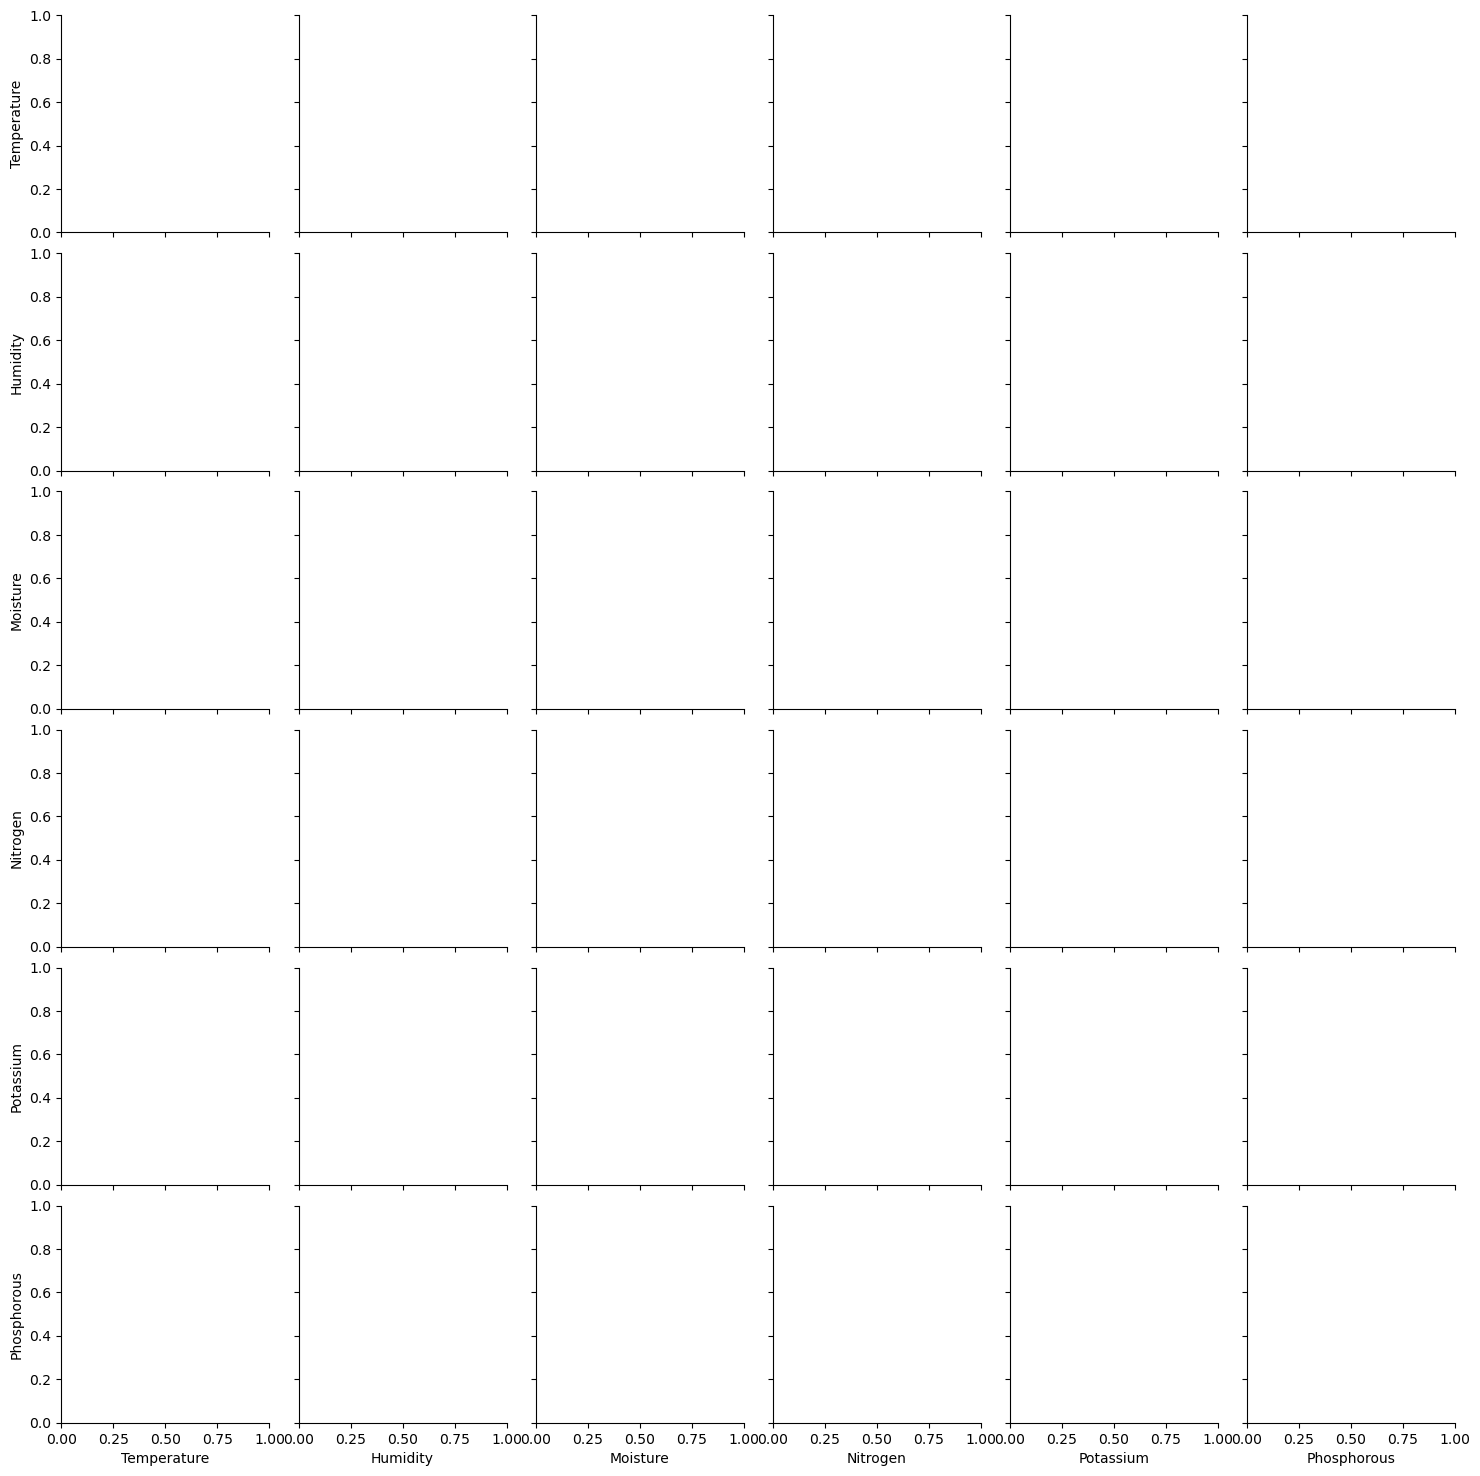

In [ ]:
# 5. Pairplot for overall relationships
sns.pairplot(df, hue="Crop Type", vars=["Temparature", "Humidity", "Moisture", "Nitrogen", "Potassium", "Phosphorous"])
plt.suptitle("Pairwise Relationships Between Features", y=1.02)
plt.show()